# How to Predict Body fat 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Read Dataset
df=pd.read_csv('data.csv' ,sep=',',header=0,encoding='utf-8')

In [3]:
#Breif summary of dataset
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [4]:
#show us some of the first rows of data
print(df.head(10))

   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   
5   1.0502     20.9   24  210.25   74.75  39.0  104.5     94.4  107.8   66.0   
6   1.0549     19.2   26  181.00   69.75  36.4  105.1     90.7  100.3   58.4   
7   1.0704     12.4   25  176.00   72.50  37.8   99.6     88.5   97.1   60.0   
8   1.0900      4.1   25  191.00   74.00  38.1  100.9     82.5   99.9   62.9   
9   1.0722     11.7   23  198.25   73.50  42.1   99.6     88.6  104.1   63.1   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.

In [5]:
#calculate Correlation withiut names of features
Correlation=df.corr()

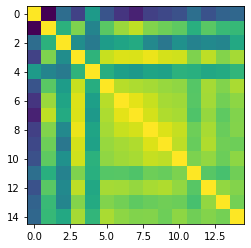

In [6]:
plt.imshow(Correlation)
plt.show()

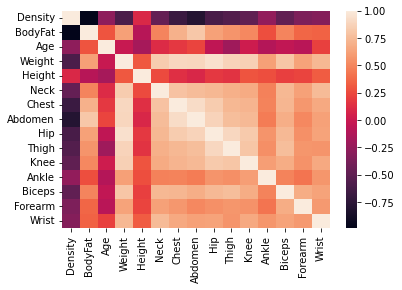

In [7]:
#we can use seaborn instead of imshow 
sb.heatmap(Correlation)
plt.show()

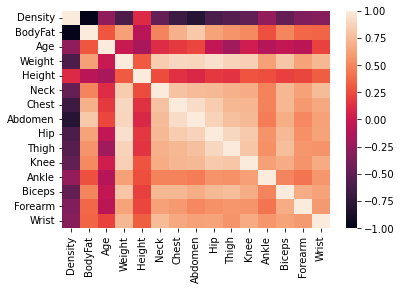

In [8]:
#if we want to show our numbers between -1 and 1 use vmin and vmax
sb.heatmap(Correlation, vmin=-1 , vmax=+1)
plt.show()

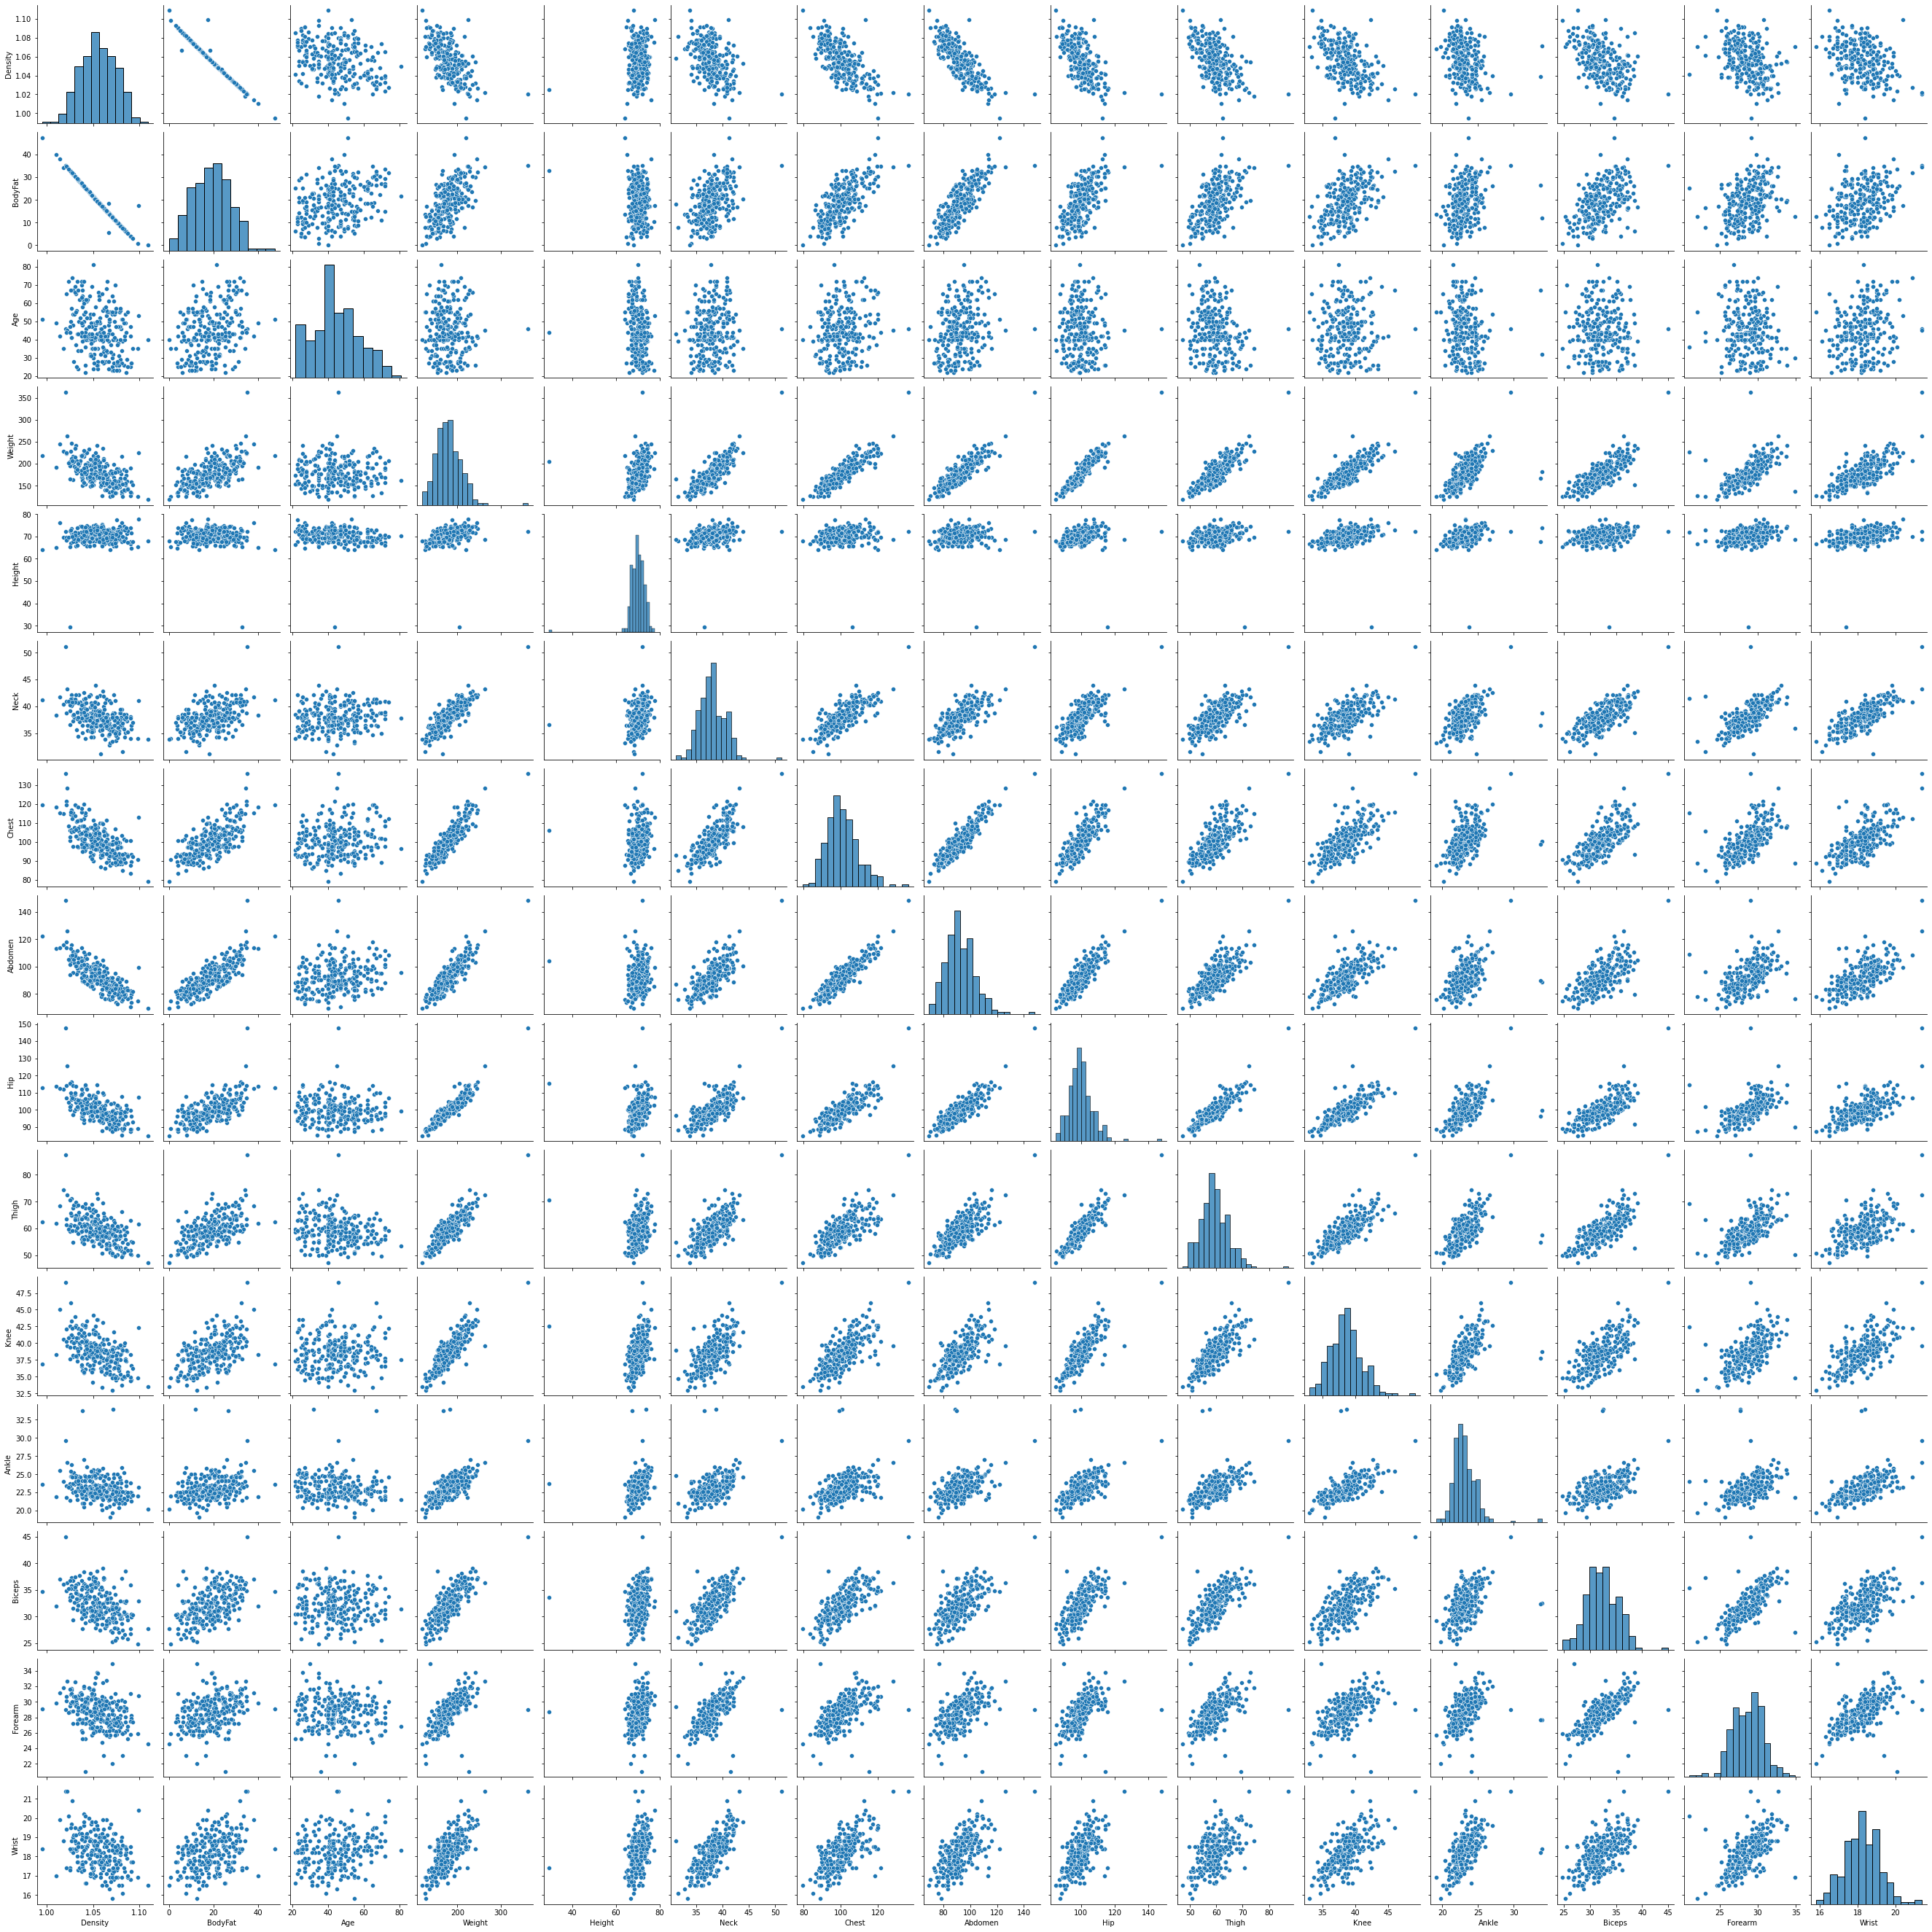

In [9]:
sb.pairplot(df)

In [10]:
#Convert df to matrix
data=df.to_numpy()

In [11]:
#Extract BodyFat column from df 
Y=df['BodyFat'].to_numpy().reshape((-1,1))

In [12]:
print(Y)

[[12.3]
 [ 6.1]
 [25.3]
 [10.4]
 [28.7]
 [20.9]
 [19.2]
 [12.4]
 [ 4.1]
 [11.7]
 [ 7.1]
 [ 7.8]
 [20.8]
 [21.2]
 [22.1]
 [20.9]
 [29. ]
 [22.9]
 [16. ]
 [16.5]
 [19.1]
 [15.2]
 [15.6]
 [17.7]
 [14. ]
 [ 3.7]
 [ 7.9]
 [22.9]
 [ 3.7]
 [ 8.8]
 [11.9]
 [ 5.7]
 [11.8]
 [21.3]
 [32.3]
 [40.1]
 [24.2]
 [28.4]
 [35.2]
 [32.6]
 [34.5]
 [32.9]
 [31.6]
 [32. ]
 [ 7.7]
 [13.9]
 [10.8]
 [ 5.6]
 [13.6]
 [ 4. ]
 [10.2]
 [ 6.6]
 [ 8. ]
 [ 6.3]
 [ 3.9]
 [22.6]
 [20.4]
 [28. ]
 [31.5]
 [24.6]
 [26.1]
 [29.8]
 [30.7]
 [25.8]
 [32.3]
 [30. ]
 [21.5]
 [13.8]
 [ 6.3]
 [12.9]
 [24.3]
 [ 8.8]
 [ 8.5]
 [13.5]
 [11.8]
 [18.5]
 [ 8.8]
 [22.2]
 [21.5]
 [18.8]
 [31.4]
 [26.8]
 [18.4]
 [27. ]
 [27. ]
 [26.6]
 [14.9]
 [23.1]
 [ 8.3]
 [14.1]
 [20.5]
 [18.2]
 [ 8.5]
 [24.9]
 [ 9. ]
 [17.4]
 [ 9.6]
 [11.3]
 [17.8]
 [22.2]
 [21.2]
 [20.4]
 [20.1]
 [22.3]
 [25.4]
 [18. ]
 [19.3]
 [18.3]
 [17.3]
 [21.4]
 [19.7]
 [28. ]
 [22.1]
 [21.3]
 [26.7]
 [16.7]
 [20.1]
 [13.9]
 [25.8]
 [18.1]
 [27.9]
 [25.3]
 [14.7]
 [16. ]
 [13.8]


In [13]:
df.drop(['BodyFat'], inplace=True,axis=1)

In [14]:
#extract df without BodyFat to X matrix
x=df.to_numpy()

In [15]:
#show the shape of X and Y
print(f'{x.shape=}')
print(f'{Y.shape=}')

x.shape=(252, 14)
Y.shape=(252, 1)


In [16]:
#for split our data to train and  test
import sklearn.model_selection as ms

In [17]:
#for Normalize we use this library
import sklearn.preprocessing as pp

In [18]:
trx,tex , trY,teY=ms.train_test_split(x,Y,train_size=0.7,random_state=0)

In [19]:
print(f'{trx.shape}')
print(f'{trY.shape}')
print(f'{tex.shape}')
print(f'{teY.shape}')

(176, 14)
(176, 1)
(76, 14)
(76, 1)


In [20]:
#we normalize both train and test data
scaler=pp.MinMaxScaler()
trx2=scaler.fit_transform(trx)
tex2=scaler.transform(tex)

In [21]:
print(f'{trx2.shape}')
print(f'{tex2.shape}')

(176, 14)
(76, 14)


In [22]:
#we want to remove the correlation between our features by PCA

In [23]:
import sklearn.decomposition as dec

In [24]:
#we want to remain 95 percent of information
pca=dec.PCA(n_components=0.95)

In [25]:
trx3=pca.fit_transform(trx2)

In [26]:
tex3=pca.transform(tex2)

In [28]:
#we remain 95 percent of information by just 8 features
print(f'{trx3.shape=}')
print(f'{tex3.shape=}')

trx3.shape=(176, 8)
tex3.shape=(76, 8)


In [33]:
#now we want to show the correlation between these 8 features using Pearson coefficient from scipy library(statistics)
import scipy.stats as stt

In [34]:
c=np.zeros((8,8))

In [36]:
for i in range(8):
    for j in range(8):
        c[i,j]=stt.pearsonr(trx3[:,i],trx3[:,j])[0]

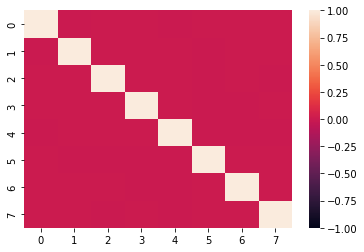

In [39]:
sb.heatmap(c,vmin=-1,vmax=+1)
plt.show()
#this plot show us PCA remove the correlations of our features near zero

In [40]:
#we normalize both train and test  Y data
scalerY=pp.MinMaxScaler()
trY2=scalerY.fit_transform(trY)
teY2=scalerY.transform(teY)

In [41]:
#we want to fit a linear model on our data
import sklearn.linear_model as li

In [42]:
lr=li.LinearRegression()
lr.fit(trx3,trY2)

LinearRegression()

In [43]:
#we want to calculate R2 scor which is show us the accuracy of our model in prediction and our goal is to maximum of R2 

In [45]:
r2train=lr.score(trx3,trY2)
r2test=lr.score(tex3,teY2)

In [46]:
print(f'{r2train=}')
print(f'{r2test=}')

r2train=0.9691615132460459
r2test=0.9792277980718869


In [47]:
#we can use these coefficient and intercept to calculate manually the predication of body fat
print(lr.coef_)
print(lr.intercept_)

[[ 0.31329298  0.34835057 -0.62093512 -0.18570815  0.32875112 -0.18751914
  -0.2784166  -0.16392331]]
[0.35788968]


In [48]:
trpred=lr.predict(trx3)
tepred=lr.predict(tex3)

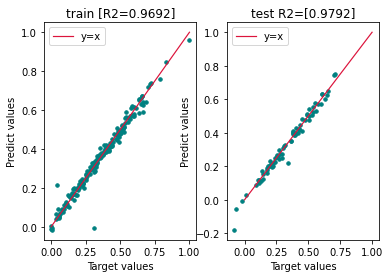

In [60]:
#Train Plot
plt.subplot(1,2,1)
plt.scatter(trY2,trpred,s=12,c='teal')
plt.plot([0,1],[0,1], c='crimson' ,lw=1.2 , label='y=x')
plt.title(f'train [R2={round(r2train,4)}]')
plt.xlabel('Target values')
plt.ylabel('Predict values')
plt.legend()

#test Plot
plt.subplot(1,2,2)
plt.scatter(teY2,tepred,s=12,c='teal')
plt.plot([0,1],[0,1], c='crimson' ,lw=1.2 , label='y=x')
plt.title(f'test R2=[{round(r2test,4)}]')
plt.xlabel('Target values')
plt.ylabel('Predict values')
plt.legend()

plt.show()


In [61]:
#we want to define a function that get a model and calcualte predictions

In [79]:
def result(model,trx,tex,trY,teY):
    r2train=model.score(trx,trY)
    r2test=model.score(tex,teY)
    
    print(f'Train R2 Score=[{r2train=}]')
    print(f'Test R2 Score=[{r2test=}]')
    
    trpred=model.predict(trx)
    tepred=model.predict(tex)
    
    a=min([np.min(trpred),np.min(tepred),0])
    b=max([np.max(trpred),np.max(tepred),1])
    
    #Train Plot
    plt.subplot(1,2,1)
    plt.scatter(trY,trpred,s=12,c='teal')
    plt.plot([a,b],[a,b], c='crimson' ,lw=1.2 , label='y=x')
    plt.title(f'train [R2={round(r2train,4)}]')
    plt.xlabel('Target values')
    plt.ylabel('Predict values')
    plt.legend()

    #test Plot
    plt.subplot(1,2,2)
    plt.scatter(teY,tepred,s=12,c='teal')
    plt.plot([a,b],[a,b], c='crimson' ,lw=1.2 , label='y=x')
    plt.title(f'test R2=[{round(r2test,4)}]')
    plt.xlabel('Target values')
    plt.ylabel('Predict values')
    plt.legend()

    plt.show();

Train R2 Score=[r2train=0.9691615132460459]
Test R2 Score=[r2test=0.9792277980718869]


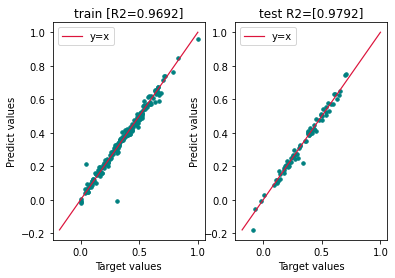

In [80]:
result(lr,trx3,tex3,trY2,teY2)

In [81]:
#now we can use this model for Neural Network

In [82]:
import sklearn.neural_network as nn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train R2 Score=[r2train=0.8994730626112192]
Test R2 Score=[r2test=0.9138395733062009]


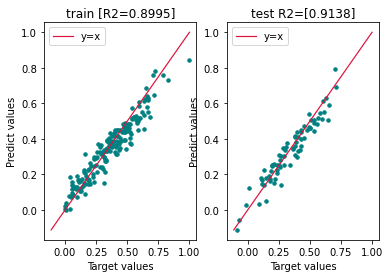

In [83]:
mlp=nn.MLPRegressor(hidden_layer_sizes=(30,40), activation='relu', random_state=0)
mlp.fit(trx3,trY2)

result(mlp,trx3,tex3,trY2,teY2)